Now we show how to have histograms (monthly precipitation) for a set of stations.

In [15]:
import numpy as np
import pandas as pd
import os
import glob
import calendar
%matplotlib inline

Create a list of files given the file directory and the file name pattern:

In [3]:
datadir = '../data/'
datafilelist = sorted(glob.glob(os.path.join(datadir, 'IDCJAC0009_*_2014_Data.csv')))

# Data reading

In [17]:
df = pd.read_csv(datafilelist[0])
station_number = (df.loc[0, 'Bureau of Meteorology station number'])
df = df[['Year', 'Month', 'Day', 'Rainfall amount (millimetres)']]
df.columns = ['Year', 'Month', 'Day', "Station {0}".format(station_number)]

for datafile in datafilelist[1:]:
    print("Working on file {0}".format(datafile))
    # Data reading
    df2merge = pd.read_csv(datafile)
    # Get the station number from the corresponding column
    station_number = (df2merge.loc[0, 'Bureau of Meteorology station number'])
    # Take only interesting columns
    df2merge = df2merge[['Year', 'Month', 'Day', 'Rainfall amount (millimetres)']]
    # Modify the column name (useful for the plot later)
    df2merge.columns = ['Year', 'Month', 'Day', "Station {0}".format(station_number)]
    # Merge the column based on Year, Month, Day
    df = pd.merge(df, df2merge, on=['Year', 'Month', 'Day'])

Working on file ../data/IDCJAC0009_014610_2014_Data.csv
Working on file ../data/IDCJAC0009_015508_2014_Data.csv
Working on file ../data/IDCJAC0009_023012_2014_Data.csv
Working on file ../data/IDCJAC0009_044044_2014_Data.csv
Working on file ../data/IDCJAC0009_091019_2014_Data.csv


In [18]:
df

,Year,Month,Day,Station 5085,Station 14610,Station 15508,Station 23012,Station 44044,Station 91019
0,2014,1,1,38.0,0.0,0.0,0.0,0.0,0.0
1,2014,1,2,0.0,0.0,0.0,NaN,0.0,2.0
2,2014,1,3,0.0,0.0,0.0,NaN,0.0,0.0
3,2014,1,4,0.0,18.0,0.0,NaN,0.0,0.0
4,2014,1,5,0.0,0.0,0.0,NaN,0.0,0.0
5,2014,1,6,0.0,0.0,0.0,NaN,0.0,5.4
6,2014,1,7,0.0,0.0,0.0,NaN,0.0,0.2
7,2014,1,8,0.0,0.0,0.0,NaN,0.0,0.0
8,2014,1,9,0.0,0.0,0.0,NaN,5.0,0.0
9,2014,1,10,0.0,0.0,0.0,NaN,14.0,0.0


We get a new dataframe with 365 lines, as expected. Each line contains the data for each station.<br>
We create a new dataframe by grouping by month as in the previous exercise.<br>
We can remove the Year and Day columns.

In [19]:
df_month = df.groupby(['Month']).sum()
df_month.drop(['Year', 'Day'], axis=1, inplace=True)
df_month

,Station 5085,Station 14610,Station 15508,Station 23012,Station 44044,Station 91019
Month,,,,,,
1,93.0,233.4,31.5,1.6,68.0,13.6
2,12.0,266.0,16.2,59.8,109.0,NaN
3,39.0,27.8,0.0,29.2,28.5,46.6
4,0.0,20.5,72.6,66.4,5.5,73.0
5,49.9,0.0,0.0,58.5,NaN,29.8
6,3.0,0.0,0.0,81.8,1.0,54.0
7,0.0,0.0,24.0,40.2,2.5,65.8
8,0.0,0.0,0.0,15.0,30.5,24.6
9,0.0,NaN,0.0,13.7,19.0,34.2


# Plot

The dataframe can be plotted without specifying anything: the index is the month, and the series to be represented are the rainfall amount for each station.

## Simple histogram

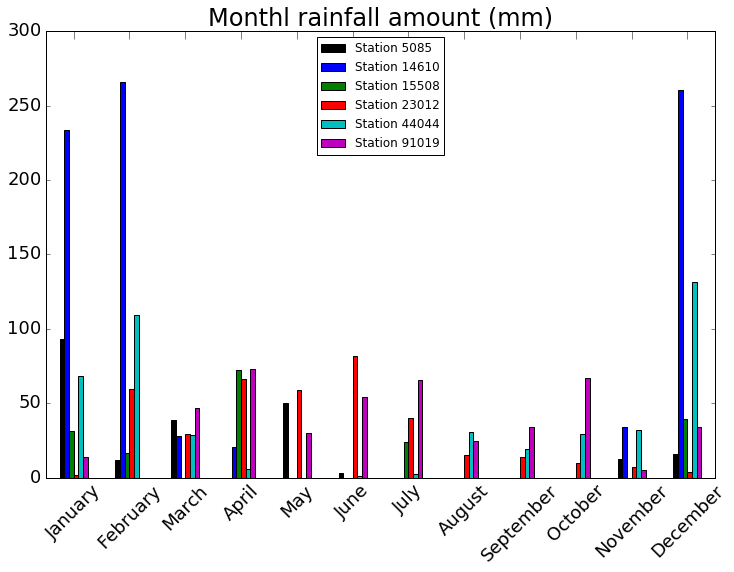

In [21]:
plt = df_month.plot(kind='bar',
                    figsize=(12 , 8), fontsize=18,
                    )
plt.set_xticklabels(calendar.month_name[1:], rotation=45)
plt.set_title('Monthl rainfall amount (mm)', fontsize='24')
plt.set_xlabel('')

## Stacked histogram

We simply add the option "stacked=True" to the previous function.

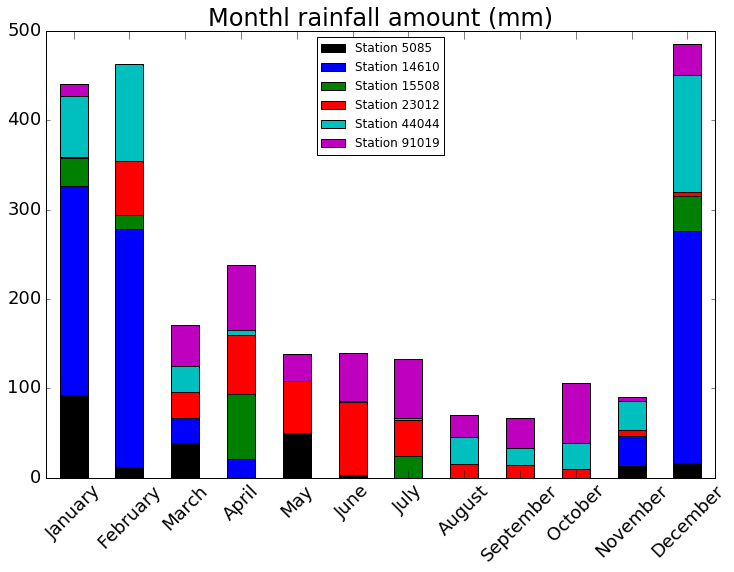

In [22]:
plt = df_month.plot(kind='bar', stacked=True,
                    figsize=(12 , 8), fontsize=18,
                    )
plt.set_xticklabels(calendar.month_name[1:], rotation=45)
plt.set_title('Monthl rainfall amount (mm)', fontsize='24')
plt.set_xlabel('')

## Changing the plot style

In recent versions of [matplotlib](http://matplotlib.org/) one can easily change the figure style or even create their own style.

In [23]:
import matplotlib
matplotlib.style.use('ggplot')

Then we can re-use the same code for the plot.

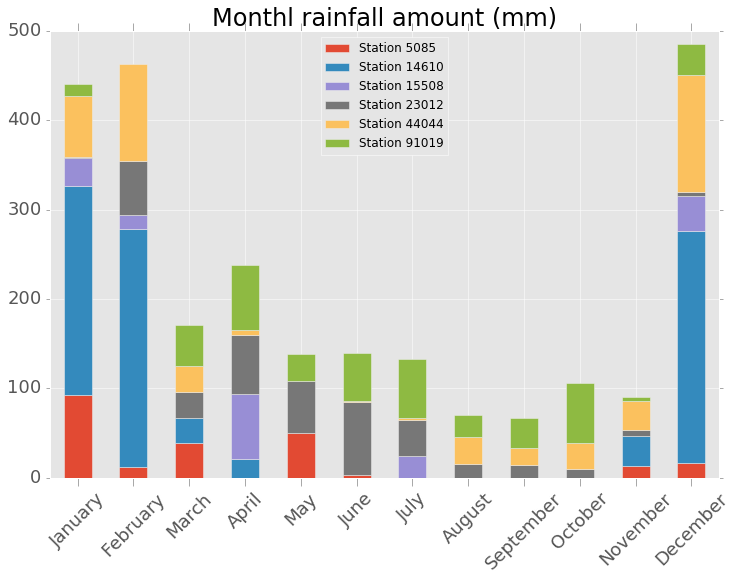

In [24]:
plt = df_month.plot(kind='bar', stacked=True,
                    figsize=(12 , 8), fontsize=18,
                    )
plt.set_xticklabels(calendar.month_name[1:], rotation=45)
plt.set_title('Monthl rainfall amount (mm)', fontsize='24')
plt.set_xlabel('')